In [2]:
from selenium import webdriver
import re
import time
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import networkx

In [3]:
df = pd.read_pickle('/home/brian/Documents/aur/pickle/core_packages_df.p')

In [4]:
def convert_to_mb(i):
    i = i.split("\xa0")
    if len(i) == 1:
        print(i)
    units = i[1]
    if "G" in units:
        return float(i[0])*1000
    if "K" in units:
        return float(i[0])/1000
    if "M" in units:
        return float(i[0])

In [5]:
df["package_size"] = [convert_to_mb(i) for i in df["Package Size"]]
df["installed_size"] = [convert_to_mb(i) for i in df["Installed Size"]]

Text(0.5,1,'Installed Size vs. Package Size')

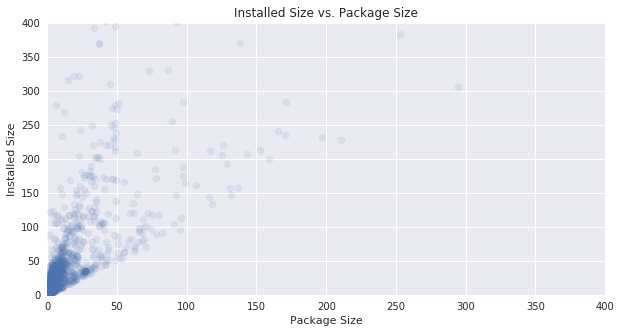

In [6]:
sns.set()
plt.figure(figsize=(10, 5))
plt.scatter(df.package_size, df.installed_size, alpha=0.1)
plt.xlabel("Package Size")
plt.ylabel("Installed Size")
plt.axis([0, 400, 0, 400])
plt.title("Installed Size vs. Package Size")

In [7]:
installed_size_sum = np.sum(df.installed_size)
package_size_sum = np.sum(df.package_size)

In [8]:
installed_size_sum/1000

118.55408099999994

In [9]:
package_size_sum/1000

36.9925654

In [22]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook
output_notebook()

output_file("/home/brian/Documents/github/briancaffey.github.io/_includes/package_sizes.html")

source = ColumnDataSource(
        data=dict(
            x=df.package_size,
            y=df.installed_size,
            desc=df.Description,
            name=df.package_name
        )
    )

hover = HoverTool(
        tooltips=[
            ("Name", "@name"),
            ("Package Size", "@x MB"),
            ("Installed Size", "@y MB"),
            ("Description", "@desc"),
        ]
    )

TOOLS = 'box_zoom,box_select,reset,pan,wheel_zoom'

p = figure(plot_width=400, plot_height=400, tools=[TOOLS, hover],
           title="Packages Size vs. Installed Size", sizing_mode='scale_width')

p.circle('x', 'y', size=5, source=source, alpha=0.2)
p.toolbar.logo = None
show(p)

Loading BokehJS ...